<a href="https://colab.research.google.com/github/ArchitTheCoder/C122/blob/main/C122_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [8]:
X, Y = fetch_openml("mnist_784", version=1, return_X_y=True)
print(pd.Series(Y).value_counts())
classes = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]
nclasses = len(classes)

1    7877
7    7293
3    7141
2    6990
9    6958
0    6903
6    6876
8    6825
4    6824
5    6313
dtype: int64


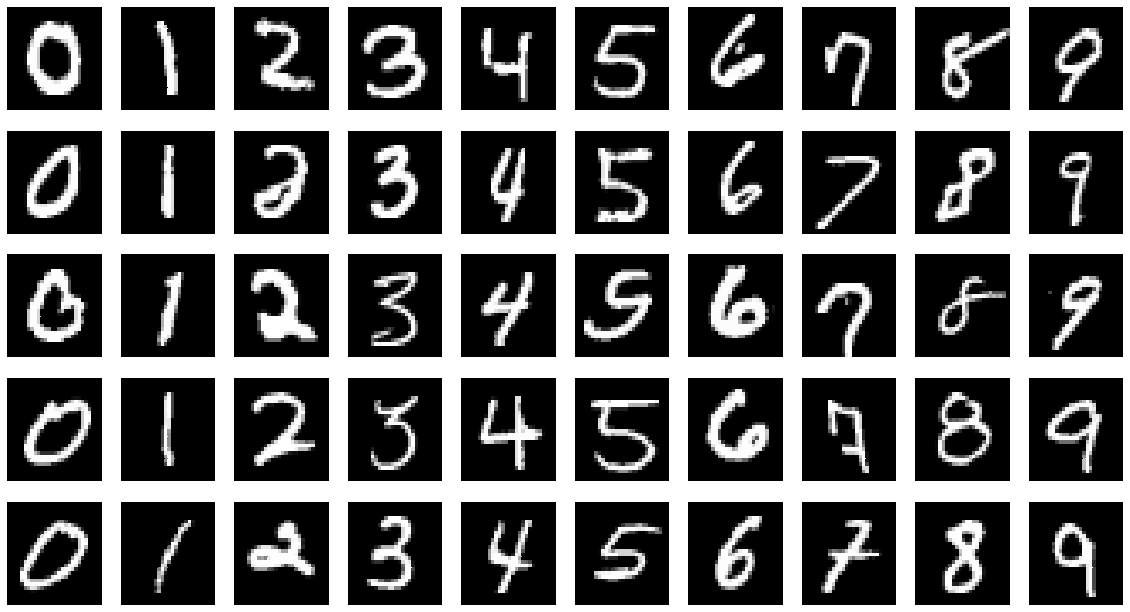

In [14]:
samples = 5
fig = plt.figure(figsize= (nclasses * 2, 1 + samples * 2))
idx_cls = 0
for cls in classes:
  idxs = np.flatnonzero(Y == cls)
  idxs = np.random.choice(idxs, samples, replace= False)
  i = 0
  for idx in idxs:
    plt_idx = i * nclasses + idx_cls + 1
    p = plt.subplot(samples, nclasses, plt_idx);
    p = sns.heatmap(np.reshape(X[idx], (28, 28)), cmap= plt.cm.gray, xticklabels= False, yticklabels= False, cbar= False);
    p = plt.axis("off");
    i += 1
  idx_cls += 1

In [16]:
print(len(X))
print(len(X[2]))

70000
784


In [19]:
print(X[0])
print(Y[0])

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
  18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
 253. 253. 253. 253. 225. 172. 253. 242. 195.  64.   0.   0.   0.   0.
   0. 

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 9, train_size = 7500, test_size = 2500)
X_train_scaled = X_train / 255.0
X_test_scaled = X_test / 255.0

In [21]:
clf = LogisticRegression(solver= "saga", multi_class= "multinomial").fit(X_train_scaled, Y_train)
y_pred = clf.predict(X_test_scaled)
accuracy = accuracy_score(Y_test, y_pred)
print(accuracy * 100)

90.08


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


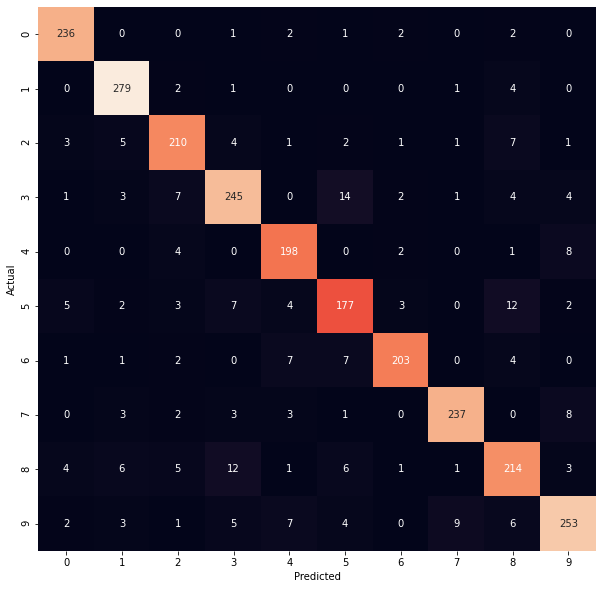

In [24]:
cm = pd.crosstab(Y_test, y_pred, rownames= ["Actual"], colnames= ["Predicted"])
p = plt.figure(figsize= (10, 10));
p = sns.heatmap(cm, annot= True, fmt= "d", cbar= False)